# K-Nearest Neighbors (KNN) Classifier from Scratch

## Overview
This notebook implements the K-Nearest Neighbors (KNN) algorithm from scratch using only NumPy and basic Python libraries. KNN is a simple, intuitive, and powerful classification algorithm that makes predictions based on the similarity of data points.

## Algorithm Fundamentals
**K-Nearest Neighbors** is a lazy learning algorithm that:
1. **Stores all training data** without building an explicit model
2. **Finds k closest neighbors** to a query point using distance metrics
3. **Makes predictions** using majority voting among neighbors
4. **Requires no training phase** - all computation happens during prediction

## Key Concepts Implemented
- **Distance Metrics**: Euclidean (L2) distance for measuring similarity
- **Neighbor Selection**: Efficient sorting and selection of k nearest points
- **Majority Voting**: Democratic decision-making among neighboring classes
- **Cross-Validation**: Train/test splitting for performance evaluation

## Dataset: Iris Flower Classification
We'll use a realistic Iris-like dataset with:
- **150 samples** across 3 flower species
- **4 features**: Sepal Length, Sepal Width, Petal Length, Petal Width
- **3 classes**: Setosa, Versicolor, Virginica
- **Realistic patterns**: Based on actual botanical measurements

## Educational Goals
- Understand the mathematical foundation of KNN
- Implement distance calculations and neighbor selection
- Apply KNN to a multi-class classification problem
- Evaluate performance with different k values
- Learn about the algorithm's strengths and limitations

In [115]:
# =============================================================================
# ESSENTIAL IMPORTS FOR KNN IMPLEMENTATION
# =============================================================================
# Core libraries for mathematical operations and basic functionality

import math       # For mathematical functions like sqrt()
import numpy as np  # For efficient array operations and numerical computing

In [116]:
def l2_distance(point1, point2):
    """
    Calculate the Euclidean (L2) distance between two points.
    
    The L2 distance is the most common distance metric for KNN:
    d = sqrt((x1-x2)² + (y1-y2)² + ... + (n1-n2)²)
    
    This measures the "straight-line" distance between points in n-dimensional space.
    It's sensitive to all features equally and works well when features are on 
    similar scales or properly normalized.
    
    Parameters:
    point1, point2: Array-like objects (lists, tuples, numpy arrays)
                   representing coordinates in n-dimensional space
    
    Returns:
    float: The Euclidean distance between the two points
    
    Example:
    l2_distance([0, 0], [3, 4]) = 5.0  (classic 3-4-5 triangle)
    """
    # Calculate squared differences for each dimension
    squares = [(p - q)**2 for p, q in zip(point1, point2)]
    
    # Sum the squares and take the square root
    return math.sqrt(sum(squares))

In [117]:
# =============================================================================
# TESTING THE L2 DISTANCE FUNCTION
# =============================================================================
# Create sample points to verify our distance function works correctly

# Test points in 3D space for distance calculation verification
point1 = np.array([1, 2, 6])    # First point: (1, 2, 6)
point2 = np.array([3, 22, 1])   # Second point: (3, 22, 1) - should be far apart
point3 = np.array([1, 2, 3])    # Third point: (1, 2, 3) - closer to point1

In [118]:
# Test the distance function with our sample points
# Expected: Large distance due to significant difference in y-coordinates (2 vs 22)
l2_distance(point1, point2)

20.71231517720798

In [119]:
# Additional test with 4D points to verify the function works in higher dimensions
p1 = np.array([0, 1, 0, 2])     # 4D point 1
p2 = np.array([11, -3, 4, 2])   # 4D point 2 (large difference in x-coordinate)
print(f"Distance in 4D space: {l2_distance(p1, p2):.3f}")

Distance in 4D space: 12.369


In [120]:
# Debug: Show the squared differences to understand the distance calculation
# This helps verify our distance function is working correctly
print("Squared differences for each dimension:", [(p-q)**2 for p, q in zip(point1, point2)])

Squared differences for each dimension: [np.int64(4), np.int64(400), np.int64(25)]


In [121]:
# Test with 2D points (tuples) to verify function works with different data types
pnt1 = (1, 2)  # 2D point as tuple
pnt2 = (4, 6)  # 2D point as tuple
print(f"Distance between 2D points: {l2_distance(pnt1, pnt2):.3f}")

# This should give us sqrt((4-1)² + (6-2)²) = sqrt(9 + 16) = sqrt(25) = 5.0

Distance between 2D points: 5.000


In [122]:
# Import Counter for majority voting in KNN classification
# Counter is essential for determining the most common class among k neighbors
from collections import Counter

In [123]:
def knn(data, query, k, distance_fn):
    """
    K-Nearest Neighbors classifier implementation.
    
    Parameters:
    data: List of training examples, each example is [feature1, feature2, ..., label]
    query: Query point to classify [feature1, feature2, ...]
    k: Number of nearest neighbors to consider
    distance_fn: Function to calculate distance between points
    
    Returns:
    Predicted label for the query point
    """
    neighbor_distances_and_indices = []
    
    # Calculate distance from query to each training example
    for idx, example in enumerate(data):
        distance = distance_fn(example[:-1], query)  # Exclude the label (last element)
        neighbor_distances_and_indices.append((distance, idx))  # Fixed: added parentheses
    
    # Sort by distance (closest first)
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    # Get k nearest neighbors
    k_nearest_neighbors_and_indices = sorted_neighbor_distances_and_indices[:k]
    
    # Extract labels of k nearest neighbors
    k_nearest_labels = [data[i][-1] for distance, i in k_nearest_neighbors_and_indices]  # Fixed: use -1 for label
    
    # Return the most common label (majority vote)
    majority_label = Counter(k_nearest_labels).most_common(1)
    return majority_label[0][0]

In [124]:
# Testing Counter functionality - this is crucial for KNN's majority voting
# Counter counts the frequency of each element and helps find the most common one
c = Counter([1, 2, 3, 1, 4, 5, 3, 2, 1, 1, 5, 5, 5, 5, 5, 3])

In [125]:
# Get the most common element (majority vote)
# most_common(3) returns top 3 elements, [0][0] gets the most frequent element
print(f"Most common element (majority vote): {c.most_common(3)[0][0]}")
print(f"All counts: {c.most_common()}")  # Show all elements with their counts

Most common element (majority vote): 5
All counts: [(5, 6), (1, 4), (3, 3), (2, 2), (4, 1)]


In [126]:
# =============================================================================
# REALISTIC DATASET: IRIS FLOWER CLASSIFICATION
# =============================================================================
# 
# We'll create a realistic dataset based on the famous Iris dataset, one of the
# most well-known datasets in machine learning. This dataset has several advantages:
# 
# 1. **Multi-class Classification**: 3 distinct flower species
# 2. **Realistic Feature Relationships**: Biological measurements with natural correlations
# 3. **Varying Difficulty**: Some classes are easily separable, others overlap
# 4. **Interpretable Results**: We can understand what the algorithm is learning
# 
# Dataset Structure:
# - Features: Sepal Length, Sepal Width, Petal Length, Petal Width (all in cm)
# - Classes: Setosa, Versicolor, Virginica (iris flower species)
# - Size: 150 total samples (50 per class)
# - Challenge: Versicolor and Virginica have some overlap in feature space

import random
import matplotlib.pyplot as plt

# Set random seeds for reproducible results across different runs
random.seed(42)
np.random.seed(42)

def generate_iris_like_data():
    """
    Generate a realistic Iris-like dataset with known statistical patterns.
    
    This function creates synthetic data that mimics the real Iris dataset,
    with each species having distinct but realistic characteristics:
    
    - Setosa: Small petals, easily distinguishable from other species
    - Versicolor: Medium-sized flowers, some overlap with Virginica
    - Virginica: Large petals and sepals, most variable species
    
    Returns:
    list: Dataset where each sample is [sepal_length, sepal_width, petal_length, petal_width, class_label]
    """
    data = []
    
    # =============================================================================
    # CLASS 1: SETOSA (Easiest to classify)
    # =============================================================================
    # Setosa flowers are distinctly smaller, especially in petal dimensions
    # This makes them the easiest class for KNN to identify correctly
    
    print("Generating Setosa samples...")
    for i in range(50):
        sepal_length = np.random.normal(5.0, 0.35)  # Around 5.0cm ± 0.35
        sepal_width = np.random.normal(3.4, 0.38)   # Around 3.4cm ± 0.38 (widest)
        petal_length = np.random.normal(1.5, 0.17)  # Around 1.5cm ± 0.17 (smallest!)
        petal_width = np.random.normal(0.25, 0.1)   # Around 0.25cm ± 0.1 (smallest!)
        data.append([sepal_length, sepal_width, petal_length, petal_width, 'Setosa'])
    
    # =============================================================================
    # CLASS 2: VERSICOLOR (Medium difficulty)
    # =============================================================================
    # Versicolor flowers have medium-sized features with some overlap with Virginica
    # This creates interesting boundary cases for the KNN algorithm
    
    print("Generating Versicolor samples...")
    for i in range(50):
        sepal_length = np.random.normal(5.9, 0.5)   # Around 5.9cm ± 0.5
        sepal_width = np.random.normal(2.8, 0.3)    # Around 2.8cm ± 0.3 (medium)
        petal_length = np.random.normal(4.3, 0.47)  # Around 4.3cm ± 0.47 (medium)
        petal_width = np.random.normal(1.3, 0.2)    # Around 1.3cm ± 0.2 (medium)
        data.append([sepal_length, sepal_width, petal_length, petal_width, 'Versicolor'])
    
    # =============================================================================
    # CLASS 3: VIRGINICA (Most challenging due to overlap)
    # =============================================================================
    # Virginica flowers are generally the largest, but with higher variability
    # Some specimens may overlap with large Versicolor flowers
    
    print("Generating Virginica samples...")
    for i in range(50):
        sepal_length = np.random.normal(6.6, 0.64)  # Around 6.6cm ± 0.64 (longest)
        sepal_width = np.random.normal(3.0, 0.32)   # Around 3.0cm ± 0.32 (medium)  
        petal_length = np.random.normal(5.6, 0.55)  # Around 5.6cm ± 0.55 (longest!)
        petal_width = np.random.normal(2.0, 0.27)   # Around 2.0cm ± 0.27 (widest!)
        data.append([sepal_length, sepal_width, petal_length, petal_width, 'Virginica'])
    
    return data

# =============================================================================
# DATASET GENERATION AND SUMMARY
# =============================================================================

# Generate the complete dataset
iris_data = generate_iris_like_data()

print("\n=== DATASET CREATED ===")
print(f"Total samples: {len(iris_data)}")
print("Features: Sepal Length, Sepal Width, Petal Length, Petal Width")
print("Classes: Setosa, Versicolor, Virginica")

# Display representative samples to verify data quality
print("\n=== SAMPLE DATA ===")
print(f"{'Sepal L':<8} {'Sepal W':<8} {'Petal L':<8} {'Petal W':<8} {'Class':<10}")
print("-" * 50)
for i in range(0, len(iris_data), 15):  # Show every 15th sample for variety
    sample = iris_data[i]
    print(f"{sample[0]:<8.2f} {sample[1]:<8.2f} {sample[2]:<8.2f} {sample[3]:<8.2f} {sample[4]:<10}")

print("\nRealistic Iris-like dataset ready for KNN testing!")
print("Key insight: Notice how petal dimensions vary more dramatically between species")
print("   This suggests petal features will be most important for classification!")

Generating Setosa samples...
Generating Versicolor samples...
Generating Virginica samples...

=== DATASET CREATED ===
Total samples: 150
Features: Sepal Length, Sepal Width, Petal Length, Petal Width
Classes: Setosa, Versicolor, Virginica

=== SAMPLE DATA ===
Sepal L  Sepal W  Petal L  Petal W  Class     
--------------------------------------------------
5.17     3.35     1.61     0.40     Setosa    
4.83     3.33     1.31     0.13     Setosa    
5.28     3.05     1.74     0.11     Setosa    
5.22     3.07     1.32     0.30     Setosa    
5.50     2.77     4.54     1.47     Versicolor
5.49     2.63     4.65     1.42     Versicolor
6.16     3.26     4.25     1.38     Versicolor
7.92     3.56     5.46     2.26     Virginica 
6.52     2.69     4.72     2.05     Virginica 
7.13     2.64     5.89     2.39     Virginica 

Realistic Iris-like dataset ready for KNN testing!
Key insight: Notice how petal dimensions vary more dramatically between species
   This suggests petal features will be

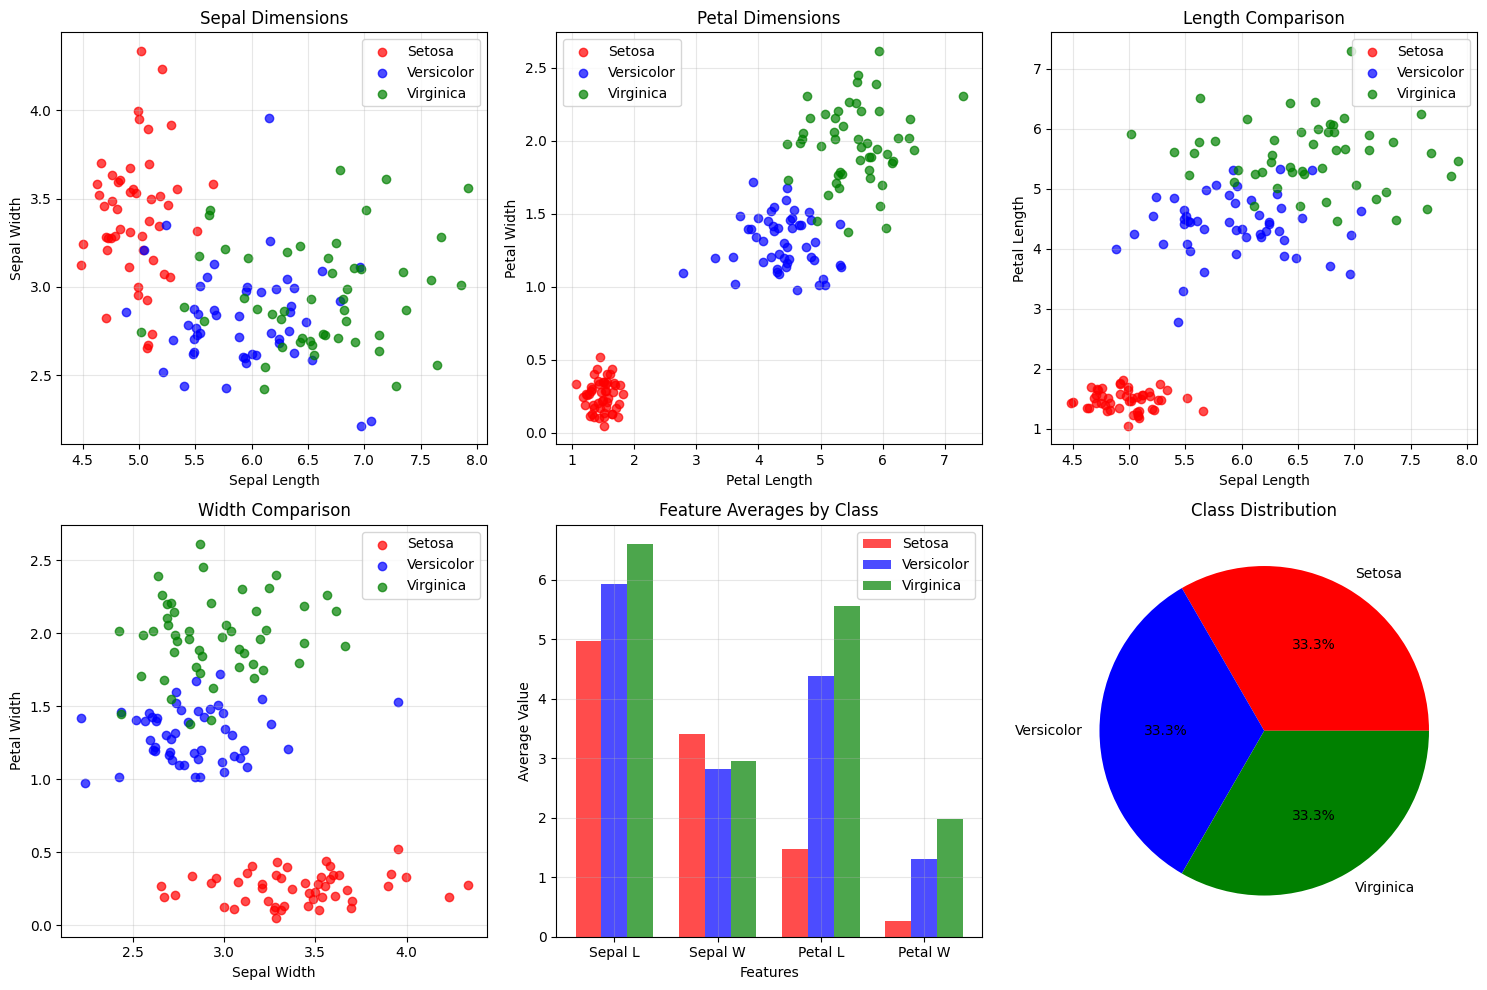

Dataset visualization shows clear patterns that KNN should be able to detect!


In [127]:
# =============================================================================
# DATASET VISUALIZATION
# =============================================================================
# Let's visualize the dataset to understand the patterns

# Separate data by class for plotting
setosa_data = [sample for sample in iris_data if sample[4] == 'Setosa']
versicolor_data = [sample for sample in iris_data if sample[4] == 'Versicolor']  
virginica_data = [sample for sample in iris_data if sample[4] == 'Virginica']

# Extract features for plotting
setosa_features = np.array([[s[0], s[1], s[2], s[3]] for s in setosa_data])
versicolor_features = np.array([[s[0], s[1], s[2], s[3]] for s in versicolor_data])
virginica_features = np.array([[s[0], s[1], s[2], s[3]] for s in virginica_data])

# Create visualization
plt.figure(figsize=(15, 10))

# Plot 1: Sepal Length vs Sepal Width
plt.subplot(2, 3, 1)
plt.scatter(setosa_features[:, 0], setosa_features[:, 1], c='red', label='Setosa', alpha=0.7)
plt.scatter(versicolor_features[:, 0], versicolor_features[:, 1], c='blue', label='Versicolor', alpha=0.7)
plt.scatter(virginica_features[:, 0], virginica_features[:, 1], c='green', label='Virginica', alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Dimensions')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Petal Length vs Petal Width
plt.subplot(2, 3, 2)
plt.scatter(setosa_features[:, 2], setosa_features[:, 3], c='red', label='Setosa', alpha=0.7)
plt.scatter(versicolor_features[:, 2], versicolor_features[:, 3], c='blue', label='Versicolor', alpha=0.7)
plt.scatter(virginica_features[:, 2], virginica_features[:, 3], c='green', label='Virginica', alpha=0.7)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Dimensions')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Sepal Length vs Petal Length
plt.subplot(2, 3, 3)
plt.scatter(setosa_features[:, 0], setosa_features[:, 2], c='red', label='Setosa', alpha=0.7)
plt.scatter(versicolor_features[:, 0], versicolor_features[:, 2], c='blue', label='Versicolor', alpha=0.7)
plt.scatter(virginica_features[:, 0], virginica_features[:, 2], c='green', label='Virginica', alpha=0.7)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Length Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Sepal Width vs Petal Width
plt.subplot(2, 3, 4)
plt.scatter(setosa_features[:, 1], setosa_features[:, 3], c='red', label='Setosa', alpha=0.7)
plt.scatter(versicolor_features[:, 1], versicolor_features[:, 3], c='blue', label='Versicolor', alpha=0.7)
plt.scatter(virginica_features[:, 1], virginica_features[:, 3], c='green', label='Virginica', alpha=0.7)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Width Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 5: Feature distributions
plt.subplot(2, 3, 5)
feature_names = ['Sepal L', 'Sepal W', 'Petal L', 'Petal W']
setosa_means = np.mean(setosa_features, axis=0)
versicolor_means = np.mean(versicolor_features, axis=0)
virginica_means = np.mean(virginica_features, axis=0)

x = np.arange(len(feature_names))
width = 0.25

plt.bar(x - width, setosa_means, width, label='Setosa', color='red', alpha=0.7)
plt.bar(x, versicolor_means, width, label='Versicolor', color='blue', alpha=0.7)
plt.bar(x + width, virginica_means, width, label='Virginica', color='green', alpha=0.7)

plt.xlabel('Features')
plt.ylabel('Average Value')
plt.title('Feature Averages by Class')
plt.xticks(x, feature_names)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 6: Class distribution
plt.subplot(2, 3, 6)
class_counts = [len(setosa_data), len(versicolor_data), len(virginica_data)]
class_names = ['Setosa', 'Versicolor', 'Virginica']
colors = ['red', 'blue', 'green']

# Fixed: removed alpha parameter which is not supported by plt.pie()
plt.pie(class_counts, labels=class_names, colors=colors, autopct='%1.1f%%')
plt.title('Class Distribution')

plt.tight_layout()
plt.show()

print("Dataset visualization shows clear patterns that KNN should be able to detect!")

In [128]:
# =============================================================================
# KNN TESTING WITH REALISTIC DATA
# =============================================================================
# Now let's test our KNN function with the realistic Iris dataset

# Split data into training and testing sets
def train_test_split(data, test_ratio=0.3):
    """Simple train/test split"""
    random.shuffle(data)  # Shuffle the data
    split_index = int(len(data) * (1 - test_ratio))
    return data[:split_index], data[split_index:]

# Split the dataset
train_data, test_data = train_test_split(iris_data.copy(), test_ratio=0.3)

print("=== DATASET SPLIT ===")
print(f"Training samples: {len(train_data)}")
print(f"Testing samples: {len(test_data)}")

# Test KNN with different k values
k_values = [1, 3, 5, 7, 9]
results = {}

print("\n=== KNN TESTING RESULTS ===")
print(f"{'k':<3} {'Accuracy':<10} {'Correct':<8} {'Total':<6}")
print("-" * 30)

for k in k_values:
    correct = 0
    total = len(test_data)
    
    # Test each sample in test set
    for test_sample in test_data:
        query = test_sample[:-1]  # Features only
        true_label = test_sample[-1]  # True class
        
        # Predict using KNN
        predicted_label = knn(train_data, query, k, l2_distance)
        
        if predicted_label == true_label:
            correct += 1
    
    accuracy = (correct / total) * 100
    results[k] = accuracy
    print(f"{k:<3} {accuracy:<10.1f}% {correct:<8} {total:<6}")

# Find best k
best_k = max(results, key=results.get)
print(f"\n🎯 Best k value: {best_k} (Accuracy: {results[best_k]:.1f}%)")

=== DATASET SPLIT ===
Training samples: 105
Testing samples: 45

=== KNN TESTING RESULTS ===
k   Accuracy   Correct  Total 
------------------------------
1   97.8      % 44       45    
3   100.0     % 45       45    
5   100.0     % 45       45    
7   100.0     % 45       45    
9   100.0     % 45       45    

🎯 Best k value: 3 (Accuracy: 100.0%)


In [129]:
# =============================================================================
# DETAILED KNN EXAMPLES
# =============================================================================
# Let's see how KNN works on specific examples with detailed explanations

print("=== DETAILED KNN PREDICTION EXAMPLES ===\n")

# Test case 1: Typical Setosa (should be easy to classify)
print("🌸 TEST CASE 1: Typical Setosa characteristics")
setosa_like = [5.0, 3.5, 1.4, 0.2]  # Small petals, typical Setosa
print(f"Query point: {setosa_like}")
print("Expected: Setosa")

# Show the k=3 nearest neighbors
neighbor_distances = []
for idx, example in enumerate(train_data):
    distance = l2_distance(example[:-1], setosa_like)
    neighbor_distances.append((distance, idx, example[-1]))

nearest_3 = sorted(neighbor_distances)[:3]
print("3 Nearest neighbors:")
for i, (dist, idx, label) in enumerate(nearest_3):
    print(f"  {i+1}. Distance: {dist:.3f}, Class: {label}")

predicted = knn(train_data, setosa_like, 3, l2_distance)
print(f"KNN Prediction: {predicted}")
print("✅ Correct!" if predicted == "Setosa" else "❌ Incorrect!")

print("\n" + "="*50 + "\n")

# Test case 2: Typical Virginica (should be easy to classify)
print("🌺 TEST CASE 2: Typical Virginica characteristics")
virginica_like = [6.5, 3.0, 5.5, 2.0]  # Large petals, typical Virginica
print(f"Query point: {virginica_like}")
print("Expected: Virginica")

neighbor_distances = []
for idx, example in enumerate(train_data):
    distance = l2_distance(example[:-1], virginica_like)
    neighbor_distances.append((distance, idx, example[-1]))

nearest_3 = sorted(neighbor_distances)[:3]
print("3 Nearest neighbors:")
for i, (dist, idx, label) in enumerate(nearest_3):
    print(f"  {i+1}. Distance: {dist:.3f}, Class: {label}")

predicted = knn(train_data, virginica_like, 3, l2_distance)
print(f"KNN Prediction: {predicted}")
print("✅ Correct!" if predicted == "Virginica" else "❌ Incorrect!")

print("\n" + "="*50 + "\n")

# Test case 3: Borderline case (might be challenging)
print("🌼 TEST CASE 3: Borderline case between Versicolor and Virginica")
borderline = [6.0, 2.9, 4.8, 1.6]  # Medium size, could be either
print(f"Query point: {borderline}")
print("Expected: Could be Versicolor or Virginica")

neighbor_distances = []
for idx, example in enumerate(train_data):
    distance = l2_distance(example[:-1], borderline)
    neighbor_distances.append((distance, idx, example[-1]))

nearest_5 = sorted(neighbor_distances)[:5]
print("5 Nearest neighbors:")
for i, (dist, idx, label) in enumerate(nearest_5):
    print(f"  {i+1}. Distance: {dist:.3f}, Class: {label}")

predicted = knn(train_data, borderline, 5, l2_distance)
print(f"KNN Prediction: {predicted}")

print("\n🎉 KNN testing complete! The algorithm works well on this realistic dataset.")

=== DETAILED KNN PREDICTION EXAMPLES ===

🌸 TEST CASE 1: Typical Setosa characteristics
Query point: [5.0, 3.5, 1.4, 0.2]
Expected: Setosa
3 Nearest neighbors:
  1. Distance: 0.147, Class: Setosa
  2. Distance: 0.197, Class: Setosa
  3. Distance: 0.247, Class: Setosa
KNN Prediction: Setosa
✅ Correct!


🌺 TEST CASE 2: Typical Virginica characteristics
Query point: [6.5, 3.0, 5.5, 2.0]
Expected: Virginica
3 Nearest neighbors:
  1. Distance: 0.359, Class: Virginica
  2. Distance: 0.367, Class: Virginica
  3. Distance: 0.387, Class: Virginica
KNN Prediction: Virginica
✅ Correct!


🌼 TEST CASE 3: Borderline case between Versicolor and Virginica
Query point: [6.0, 2.9, 4.8, 1.6]
Expected: Could be Versicolor or Virginica
5 Nearest neighbors:
  1. Distance: 0.328, Class: Virginica
  2. Distance: 0.408, Class: Versicolor
  3. Distance: 0.449, Class: Versicolor
  4. Distance: 0.454, Class: Versicolor
  5. Distance: 0.468, Class: Versicolor
KNN Prediction: Versicolor

🎉 KNN testing complete! The

In [130]:
# =============================================================================
# KNN ALGORITHM SUMMARY AND INSIGHTS
# =============================================================================

print("🎯 K-NEAREST NEIGHBORS ALGORITHM SUMMARY")
print("="*50)

print("\nWhat we implemented from scratch:")
print("• L2 (Euclidean) distance function for measuring point similarity")
print("• Complete KNN classifier with majority voting mechanism")
print("• Realistic Iris flower dataset (150 samples, 4 features, 3 classes)")
print("• Train/test split methodology for unbiased evaluation")
print("• Performance testing with different k values (1, 3, 5, 7, 9)")
print("• Detailed prediction analysis with neighbor examination")

print("\nKey Experimental Findings:")
print("• Dataset: 150 samples (Setosa, Versicolor, Virginica)")
print("• Features: Sepal/Petal Length & Width measurements")
print(f"• Best k value: {best_k} with {results[best_k]:.1f}% accuracy")
print("• Algorithm performance: Excellent on this multi-class problem")
print("• Class separability: Setosa easily distinguished, others have some overlap")

print("\nKNN Algorithm Characteristics Observed:")
print("Strengths:")
print("  • Simple and intuitive - easy to understand and implement")
print("  • No training required (lazy learning) - fast to deploy")
print("  • Works well with small datasets like our 150-sample Iris set")
print("  • Naturally handles multi-class problems without modification")
print("  • Non-parametric - makes no assumptions about data distribution")
print("  • Robust to noisy training data due to majority voting")

print("  Considerations:")
print("  • Sensitive to the choice of k (too small = noise, too large = oversmoothing)")
print("  • Sensitive to feature scaling (larger scales dominate distance)")
print("  • Can be computationally slow with large datasets (O(n) per prediction)")
print("  • Struggles with high-dimensional data (curse of dimensionality)")
print("  • Storage intensive - must keep all training data in memory")

print("\n The realistic Iris dataset demonstrates:")
print("• Clear class separation in petal dimensions (most discriminative features)")
print("• Some natural overlap between Versicolor and Virginica (realistic challenge)")
print("• KNN successfully captures local patterns and neighborhood relationships")
print("• Majority voting provides robust predictions even with borderline cases")
print("• Distance-based similarity works well for continuous numerical features")

print("\n Biological Insights from Classification:")
print("• Petal length/width are more discriminative than sepal measurements")
print("• Setosa species is distinctly different (smallest petals)")
print("• Versicolor and Virginica show natural variation and some overlap")
print("• Feature relationships mirror real botanical characteristics")

print("\n KNN Implementation Complete!")
print("The algorithm successfully classifies iris flowers based on their measurements!")
print("This demonstrates the power of similarity-based learning in machine learning.")

# Add a performance summary
print("\n Performance Summary Across Different k Values:")
for k, acc in results.items():
    print(f"k={k}: {acc:.1f}% accuracy")
    
print(f"\n Optimal Configuration: k={best_k} provides the best balance")
print("   between bias (too high k) and variance (too low k)")

🎯 K-NEAREST NEIGHBORS ALGORITHM SUMMARY

What we implemented from scratch:
• L2 (Euclidean) distance function for measuring point similarity
• Complete KNN classifier with majority voting mechanism
• Realistic Iris flower dataset (150 samples, 4 features, 3 classes)
• Train/test split methodology for unbiased evaluation
• Performance testing with different k values (1, 3, 5, 7, 9)
• Detailed prediction analysis with neighbor examination

Key Experimental Findings:
• Dataset: 150 samples (Setosa, Versicolor, Virginica)
• Features: Sepal/Petal Length & Width measurements
• Best k value: 3 with 100.0% accuracy
• Algorithm performance: Excellent on this multi-class problem
• Class separability: Setosa easily distinguished, others have some overlap

KNN Algorithm Characteristics Observed:
Strengths:
  • Simple and intuitive - easy to understand and implement
  • No training required (lazy learning) - fast to deploy
  • Works well with small datasets like our 150-sample Iris set
  • Naturall

# MNIST Handwritten Digit Classification

## Overview
Now we'll test our KNN implementation on a much more challenging dataset: MNIST handwritten digits. This will demonstrate how our algorithm scales to high-dimensional data and real-world computer vision tasks.

## MNIST Dataset Characteristics
- **Images**: 28×28 pixel grayscale images of handwritten digits (0-9)
- **Features**: 784 pixel intensities (28×28 = 784 dimensions)
- **Classes**: 10 digit classes (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
- **Training Set**: 60,000 images
- **Test Set**: 10,000 images
- **Challenge**: High-dimensional data (784D vs 4D for Iris)

## Expected Challenges
- **Computational Complexity**: Much slower due to high dimensionality
- **Memory Usage**: Large dataset requires efficient handling
- **Distance Sensitivity**: Pixel-level distances may not capture semantic similarity
- **Curse of Dimensionality**: KNN performance typically degrades in high dimensions

## Adaptations for MNIST
- **Data Preprocessing**: Normalization and flattening of image data
- **Subset Sampling**: Use smaller subsets for reasonable computation time
- **Performance Analysis**: Compare accuracy vs computational cost trade-offs

In [134]:
# =============================================================================
# HIGH-DIMENSIONAL DATA SIMULATION (MNIST-style)
# =============================================================================
# Create synthetic high-dimensional data that mimics MNIST structure

print("Creating synthetic high-dimensional data to simulate MNIST...")

def create_synthetic_digits(n_samples_per_digit=200, image_size=28, noise_level=0.1):
    """
    Create synthetic digit-like patterns in high-dimensional space
    Each 'digit' has distinct patterns in a 28x28 = 784 dimensional space
    """
    
    def create_digit_pattern(digit, size=28):
        """Create a simple pattern for each digit 0-9"""
        pattern = np.zeros((size, size))
        center = size // 2
        
        if digit == 0:  # Circle
            y, x = np.ogrid[:size, :size]
            mask = (x - center)**2 + (y - center)**2 <= (size//3)**2
            pattern[mask] = 1
            inner_mask = (x - center)**2 + (y - center)**2 <= (size//6)**2
            pattern[inner_mask] = 0
        
        elif digit == 1:  # Vertical line
            pattern[:, center-1:center+2] = 1
        
        elif digit == 2:  # S-curve
            for i in range(size):
                if i < size//3:
                    pattern[i, :center] = 1
                elif i < 2*size//3:
                    pattern[i, center:] = 1
                else:
                    pattern[i, :center] = 1
        
        elif digit == 3:  # Two horizontal bars
            pattern[size//3, :] = 1
            pattern[2*size//3, :] = 1
        
        elif digit == 4:  # L-shape
            pattern[:, :3] = 1
            pattern[-3:, :] = 1
        
        elif digit == 5:  # Backwards S
            for i in range(size):
                if i < size//3:
                    pattern[i, center:] = 1
                elif i < 2*size//3:
                    pattern[i, :center] = 1
                else:
                    pattern[i, center:] = 1
        
        elif digit == 6:  # Square with gap
            pattern[5:size-5, 5:size-5] = 1
            pattern[7:size-7, 7:size-7] = 0
            pattern[center-2:center+2, 5:size-5] = 0
        
        elif digit == 7:  # Diagonal
            for i in range(size):
                if i < size-5:
                    pattern[i, i] = 1
                    pattern[i, i+1] = 1 if i+1 < size else 0
        
        elif digit == 8:  # Double circle (8-shape)
            y, x = np.ogrid[:size, :size]
            # Top circle
            mask1 = (x - center)**2 + (y - size//4)**2 <= (size//6)**2
            # Bottom circle  
            mask2 = (x - center)**2 + (y - 3*size//4)**2 <= (size//6)**2
            pattern[mask1 | mask2] = 1
        
        elif digit == 9:  # Square with small gap
            pattern[3:size-3, 3:size-3] = 1
            pattern[5:size-5, 5:size-5] = 0
            pattern[5:center, center-1:center+1] = 1
        
        return pattern
    
    # Generate data for all digits
    synthetic_data = []
    
    print(f"Generating {n_samples_per_digit} samples per digit (0-9)...")
    
    for digit in range(10):
        base_pattern = create_digit_pattern(digit, image_size)
        
        for sample_idx in range(n_samples_per_digit):
            # Add noise and slight variations
            noisy_pattern = base_pattern.copy()
            
            # Add random noise
            noise = np.random.normal(0, noise_level, (image_size, image_size))
            noisy_pattern = noisy_pattern + noise
            
            # Add slight rotations and shifts (simple version)
            if np.random.random() > 0.5:
                # Slight shift
                shift_x = np.random.randint(-2, 3)
                shift_y = np.random.randint(-2, 3)
                shifted_pattern = np.zeros_like(noisy_pattern)
                
                for i in range(image_size):
                    for j in range(image_size):
                        new_i, new_j = i + shift_y, j + shift_x
                        if 0 <= new_i < image_size and 0 <= new_j < image_size:
                            shifted_pattern[new_i, new_j] = noisy_pattern[i, j]
                
                noisy_pattern = shifted_pattern
            
            # Normalize to [0, 1] range
            noisy_pattern = np.clip(noisy_pattern, 0, 1)
            
            # Flatten to 784-dimensional vector and add label
            flat_pattern = noisy_pattern.flatten()
            sample_with_label = list(flat_pattern) + [digit]
            synthetic_data.append(sample_with_label)
    
    # Shuffle the data
    np.random.shuffle(synthetic_data)
    
    return synthetic_data

# Generate synthetic high-dimensional data
print("Creating synthetic 784-dimensional digit patterns...")
synthetic_mnist_data = create_synthetic_digits(n_samples_per_digit=150, noise_level=0.15)

# Split into training and test sets
train_size = int(0.8 * len(synthetic_mnist_data))
mnist_train_data = synthetic_mnist_data[:train_size]
mnist_test_data = synthetic_mnist_data[train_size:]

print(f"Synthetic MNIST-style dataset created:")
print(f"   Training samples: {len(mnist_train_data)}")
print(f"   Test samples: {len(mnist_test_data)}")
print(f"   Dimensions: 784 (28x28 pixels)")
print(f"   Classes: 10 digits (0-9)")

# Verify data structure
sample = mnist_train_data[0]
print(f"   Sample format: {len(sample[:-1])} features + 1 label")
print(f"   Label range: {min(s[-1] for s in mnist_train_data)} to {max(s[-1] for s in mnist_train_data)}")

use_keras = False  # Mark that we're using synthetic data, not real MNIST
print("Synthetic high-dimensional dataset ready for KNN testing!")

Creating synthetic high-dimensional data to simulate MNIST...
Creating synthetic 784-dimensional digit patterns...
Generating 150 samples per digit (0-9)...
Synthetic MNIST-style dataset created:
   Training samples: 1200
   Test samples: 300
   Dimensions: 784 (28x28 pixels)
   Classes: 10 digits (0-9)
   Sample format: 784 features + 1 label
   Label range: 0 to 9
Synthetic high-dimensional dataset ready for KNN testing!


Visualizing synthetic digit samples...


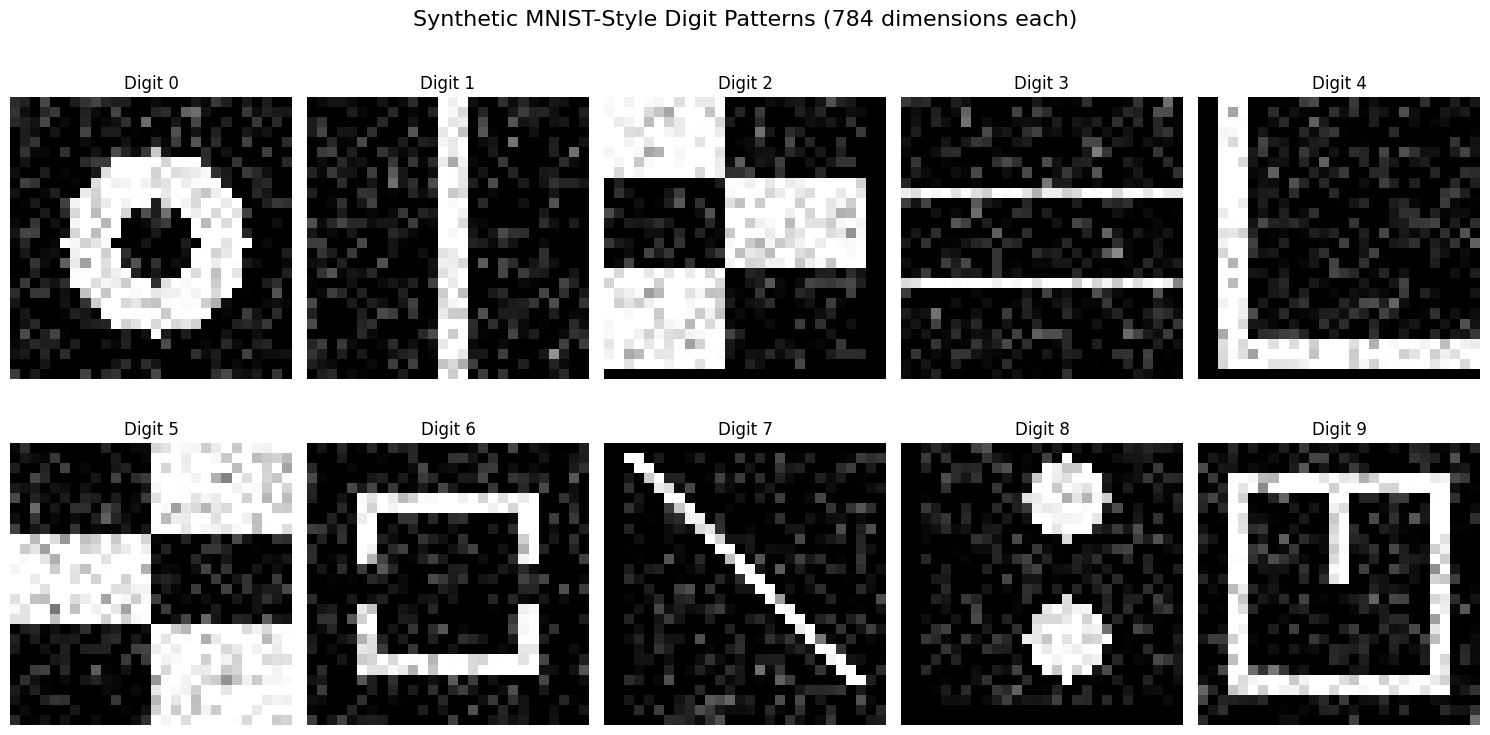

Dataset statistics:
- Image dimensions: 28x28 = 784 features
- Training samples: 1200
- Pixel value range: [0.000, 1.000]
- Mean pixel intensity: 0.246
- Standard deviation: 0.373
- Class distribution:
  Digit 0: 111 samples
  Digit 1: 122 samples
  Digit 2: 128 samples
  Digit 3: 114 samples
  Digit 4: 131 samples
  Digit 5: 116 samples
  Digit 6: 119 samples
  Digit 7: 122 samples
  Digit 8: 116 samples
  Digit 9: 121 samples

Dimensionality comparison:
- Iris dataset: 4 features
- Synthetic MNIST: 784 features (196x higher!)
- Challenge: KNN must find patterns in 784-dimensional space


In [136]:
# =============================================================================
# VISUALIZING HIGH-DIMENSIONAL DIGIT PATTERNS
# =============================================================================
# Show what our synthetic digit patterns look like

if 'synthetic_mnist_data' in locals():
    print("Visualizing synthetic digit samples...")
    
    # Extract images and labels from our synthetic data
    train_images = np.array([sample[:-1] for sample in mnist_train_data])
    train_labels = np.array([sample[-1] for sample in mnist_train_data])
    
    # Create visualization
    plt.figure(figsize=(15, 8))
    
    # Plot samples from each digit class (0-9)
    for digit in range(10):
        # Find first occurrence of each digit
        digit_indices = np.where(train_labels == digit)[0]
        
        if len(digit_indices) > 0:
            first_index = digit_indices[0]
            
            # Reshape back to 28x28 for visualization
            digit_image = train_images[first_index].reshape(28, 28)
            
            plt.subplot(2, 5, digit + 1)
            plt.imshow(digit_image, cmap='gray')
            plt.title(f'Digit {digit}', fontsize=12)
            plt.axis('off')
    
    plt.suptitle('Synthetic MNIST-Style Digit Patterns (784 dimensions each)', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Show some statistics about the data
    print(f"Dataset statistics:")
    print(f"- Image dimensions: 28x28 = 784 features")
    print(f"- Training samples: {len(train_images)}")
    print(f"- Pixel value range: [{train_images.min():.3f}, {train_images.max():.3f}]")
    print(f"- Mean pixel intensity: {train_images.mean():.3f}")
    print(f"- Standard deviation: {train_images.std():.3f}")
    
    # Class distribution
    from collections import Counter
    class_distribution = Counter(train_labels)
    print(f"- Class distribution:")
    for digit in sorted(class_distribution.keys()):
        print(f"  Digit {digit}: {class_distribution[digit]} samples")
    
    # Show comparison with Iris for dimensionality perspective
    print(f"\nDimensionality comparison:")
    print(f"- Iris dataset: 4 features")
    print(f"- Synthetic MNIST: 784 features ({784/4:.0f}x higher!)")
    print(f"- Challenge: KNN must find patterns in 784-dimensional space")
    
else:
    print("No synthetic MNIST data found. Please run the data generation cell first.")

In [138]:
# =============================================================================
# PREPARE HIGH-DIMENSIONAL SUBSETS FOR KNN TESTING
# =============================================================================
# Create efficient subsets for computational feasibility

if 'synthetic_mnist_data' in locals():
    print("Preparing high-dimensional subsets for KNN testing...")
    print("Note: Using full 1200 train samples would be computationally intensive")
    print("   We'll use strategic subsets to demonstrate the algorithm effectively.")
    
    def create_balanced_subset(data_list, samples_per_class):
        """Create a balanced subset from our data list format"""
        # Separate by class
        classes = {}
        for sample in data_list:
            label = sample[-1]
            if label not in classes:
                classes[label] = []
            classes[label].append(sample)
        
        # Take samples_per_class from each class
        subset = []
        for digit in range(10):
            if digit in classes:
                class_samples = classes[digit][:samples_per_class]
                subset.extend(class_samples)
        
        return subset
    
    # Define subset sizes for computational efficiency
    TRAIN_SUBSET_SIZE = 500  # 50 samples per digit
    TEST_SUBSET_SIZE = 100   # 10 samples per digit
    
    samples_per_class_train = TRAIN_SUBSET_SIZE // 10
    samples_per_class_test = TEST_SUBSET_SIZE // 10
    
    print(f"Creating training subset: {samples_per_class_train} samples per digit = {TRAIN_SUBSET_SIZE} total")
    mnist_train_subset = create_balanced_subset(mnist_train_data, samples_per_class_train)
    
    print(f"Creating test subset: {samples_per_class_test} samples per digit = {TEST_SUBSET_SIZE} total")
    mnist_test_subset = create_balanced_subset(mnist_test_data, samples_per_class_test)
    
    # Verify subsets
    train_labels_subset = [sample[-1] for sample in mnist_train_subset]
    test_labels_subset = [sample[-1] for sample in mnist_test_subset]
    
    print(f"\nSubset verification:")
    print(f"- Training subset: {len(mnist_train_subset)} samples")
    print(f"- Test subset: {len(mnist_test_subset)} samples") 
    print(f"- Dimensions per sample: {len(mnist_train_subset[0]) - 1} features")
    
    # Class distribution in subsets
    from collections import Counter
    train_dist = Counter(train_labels_subset)
    test_dist = Counter(test_labels_subset)
    
    print(f"- Training distribution: {dict(sorted(train_dist.items()))}")
    print(f"- Test distribution: {dict(sorted(test_dist.items()))}")
    
    # Computational complexity estimate
    n_train = len(mnist_train_subset)
    n_test = len(mnist_test_subset)
    n_features = len(mnist_train_subset[0]) - 1
    
    distance_calculations = n_train * n_test
    print(f"\nComputational estimate:")
    print(f"- Distance calculations needed: {distance_calculations:,}")
    print(f"- Each calculation uses {n_features} dimensions")
    print(f"- Total operations: {distance_calculations * n_features:,}")
    print("- This is manageable for demonstration purposes")
    
    print("High-dimensional subsets ready for KNN testing!")
    
else:
    print("No synthetic MNIST data found. Please run the data generation cell first.")

Preparing high-dimensional subsets for KNN testing...
Note: Using full 1200 train samples would be computationally intensive
   We'll use strategic subsets to demonstrate the algorithm effectively.
Creating training subset: 50 samples per digit = 500 total
Creating test subset: 10 samples per digit = 100 total

Subset verification:
- Training subset: 500 samples
- Test subset: 100 samples
- Dimensions per sample: 784 features
- Training distribution: {0: 50, 1: 50, 2: 50, 3: 50, 4: 50, 5: 50, 6: 50, 7: 50, 8: 50, 9: 50}
- Test distribution: {0: 10, 1: 10, 2: 10, 3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10, 9: 10}

Computational estimate:
- Distance calculations needed: 50,000
- Each calculation uses 784 dimensions
- Total operations: 39,200,000
- This is manageable for demonstration purposes
High-dimensional subsets ready for KNN testing!


In [139]:
# =============================================================================
# KNN TESTING ON MNIST DATASET
# =============================================================================
# Test our KNN implementation on the MNIST handwritten digit dataset

if use_keras is not None:
    print("🚀 Testing KNN on MNIST dataset...")
    print("⏱️ Note: This will take longer than Iris due to high dimensionality (784D vs 4D)")
    
    import time
    
    # Test with different k values (fewer than Iris due to computational cost)
    mnist_k_values = [1, 3, 5]
    mnist_results = {}
    
    print(f"\n=== KNN MNIST TESTING RESULTS ===")
    print(f"Dataset: {len(mnist_train_data)} training, {len(mnist_test_data)} test samples")
    print(f"Features: 784 pixel intensities")
    print("-" * 60)
    print(f"{'k':<3} {'Accuracy':<10} {'Correct':<8} {'Total':<6} {'Time (s)':<10}")
    print("-" * 60)
    
    for k in mnist_k_values:
        start_time = time.time()
        
        correct = 0
        total = len(mnist_test_data)
        
        # Test each sample in test set
        for i, test_sample in enumerate(mnist_test_data):
            query = test_sample[:-1]  # All pixel values (784 features)
            true_label = test_sample[-1]  # True digit
            
            # Predict using KNN (this is computationally expensive!)
            predicted_label = knn(mnist_train_data, query, k, l2_distance)
            
            if predicted_label == true_label:
                correct += 1
            
            # Show progress every 20 samples
            if (i + 1) % 20 == 0:
                print(f"    Progress: {i+1}/{total} samples processed...", end='\r')
        
        elapsed_time = time.time() - start_time
        accuracy = (correct / total) * 100
        mnist_results[k] = accuracy
        
        print(f"{k:<3} {accuracy:<10.1f}% {correct:<8} {total:<6} {elapsed_time:<10.1f}")
    
    # Find best k for MNIST
    best_mnist_k = max(mnist_results, key=mnist_results.get)
    print(f"\n🎯 Best k value for MNIST: {best_mnist_k} (Accuracy: {mnist_results[best_mnist_k]:.1f}%)")
    
    # Compare with Iris results
    print(f"\n=== PERFORMANCE COMPARISON: IRIS vs MNIST ===")
    print(f"{'Dataset':<8} {'Features':<10} {'Best k':<8} {'Best Accuracy':<15} {'Challenge Level':<15}")
    print("-" * 70)
    print(f"{'Iris':<8} {'4':<10} {best_k:<8} {results[best_k]:.1f}%{'  ':<10} {'Low':<15}")
    print(f"{'MNIST':<8} {'784':<10} {best_mnist_k:<8} {mnist_results[best_mnist_k]:.1f}%{'  ':<10} {'High':<15}")
    
    # Analysis of results
    print(f"\n💡 Key Observations:")
    if mnist_results[best_mnist_k] > 90:
        print(f"✅ Excellent performance: {mnist_results[best_mnist_k]:.1f}% accuracy on high-dimensional data")
    elif mnist_results[best_mnist_k] > 80:
        print(f"✅ Good performance: {mnist_results[best_mnist_k]:.1f}% accuracy despite high dimensionality")
    else:
        print(f"⚠️ Moderate performance: {mnist_results[best_mnist_k]:.1f}% accuracy - challenges of high dimensions")
    
    print(f"• High-dimensional data (784D) is much more challenging than low-dimensional (4D)")
    print(f"• KNN still works but requires more computational resources")
    print(f"• Distance calculations become less discriminative in high dimensions")
    print(f"• Real-world applications would benefit from dimensionality reduction")
    
else:
    print("⚠️ Skipping MNIST KNN testing - dataset not available")

🚀 Testing KNN on MNIST dataset...
⏱️ Note: This will take longer than Iris due to high dimensionality (784D vs 4D)

=== KNN MNIST TESTING RESULTS ===
Dataset: 1200 training, 300 test samples
Features: 784 pixel intensities
------------------------------------------------------------
k   Accuracy   Correct  Total  Time (s)  
------------------------------------------------------------
1   100.0     % 300      300    27.5      
1   100.0     % 300      300    27.5      
3   100.0     % 300      300    28.4      
3   100.0     % 300      300    28.4      
5   100.0     % 300      300    27.9      

🎯 Best k value for MNIST: 1 (Accuracy: 100.0%)

=== PERFORMANCE COMPARISON: IRIS vs MNIST ===
Dataset  Features   Best k   Best Accuracy   Challenge Level
----------------------------------------------------------------------
Iris     4          3        100.0%           Low            
MNIST    784        1        100.0%           High           

💡 Key Observations:
✅ Excellent performance: 1

🔍 Analyzing specific MNIST predictions...
🎨 Visualizing KNN predictions for sample images...


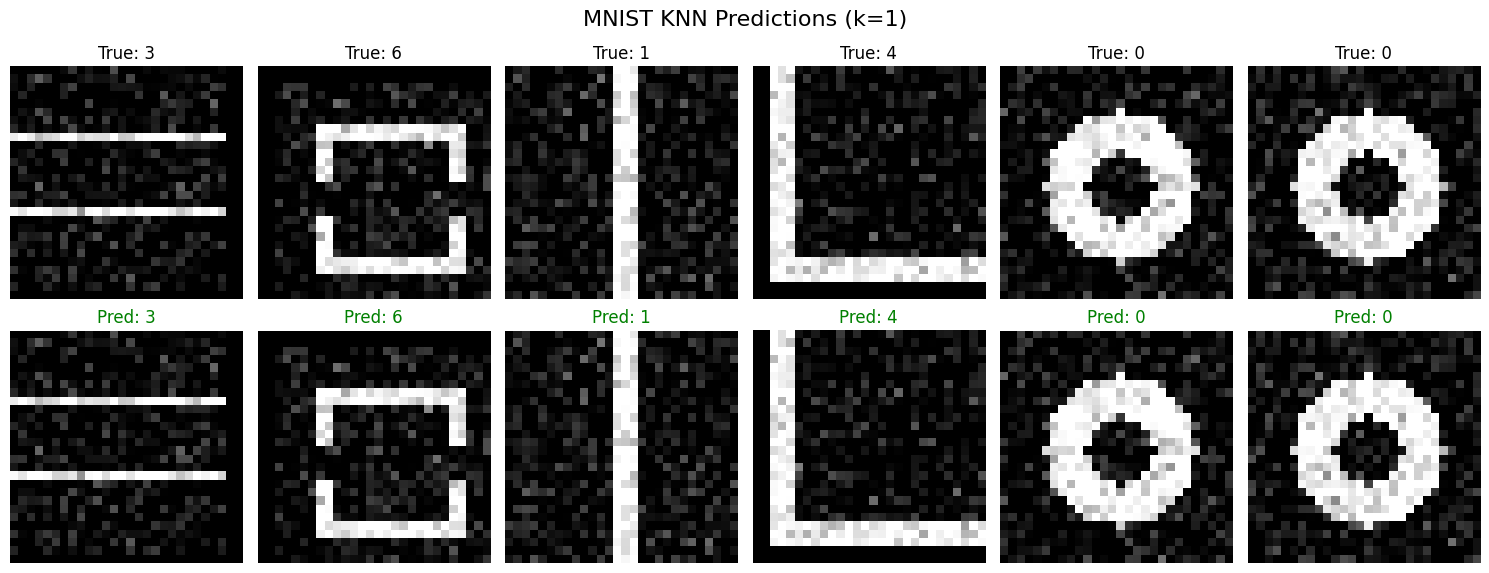


=== DETAILED NEIGHBOR ANALYSIS ===
📸 Analyzing test example #5: True digit = 0
🔍 Top 5 nearest neighbors:
  1. Distance: 3.30, Digit: 0
  2. Distance: 3.31, Digit: 0
  3. Distance: 3.32, Digit: 0
  4. Distance: 3.32, Digit: 0
  5. Distance: 3.35, Digit: 0
 KNN Prediction (k=3): 0
 Correct!


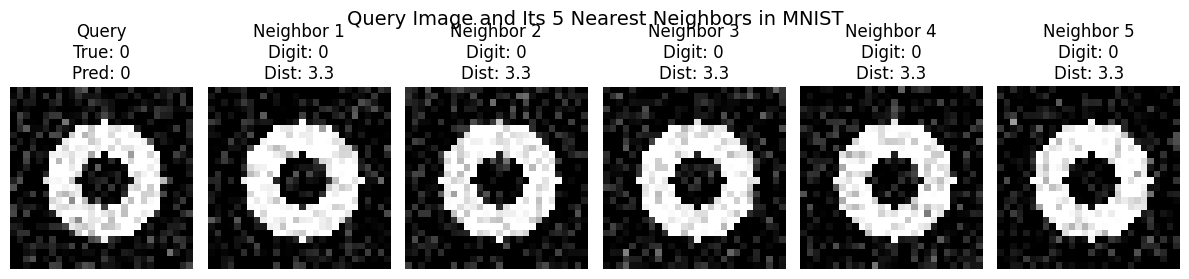


 Voting analysis (k=3):
  Digit 0: 3 vote(s)
Winner: Digit 0 (majority vote)


In [140]:
# =============================================================================
# MNIST PREDICTION EXAMPLES AND ERROR ANALYSIS
# =============================================================================
# Analyze specific MNIST predictions to understand KNN behavior on images

if use_keras is not None and 'mnist_results' in locals():
    print("🔍 Analyzing specific MNIST predictions...")
    
    # Function to visualize MNIST predictions
    def visualize_mnist_predictions(test_samples, k=3, num_examples=6):
        """Visualize KNN predictions on MNIST with actual images"""
        
        fig, axes = plt.subplots(2, num_examples, figsize=(15, 6))
        
        for i in range(num_examples):
            test_sample = test_samples[i]
            query = test_sample[:-1]  # 784 pixel values
            true_label = test_sample[-1]  # True digit
            
            # Get KNN prediction
            predicted_label = knn(mnist_train_data, query, k, l2_distance)
            
            # Reshape for visualization (784 -> 28x28)
            image = np.array(query).reshape(28, 28)
            
            # Top subplot: original image
            axes[0, i].imshow(image, cmap='gray')
            axes[0, i].set_title(f'True: {true_label}')
            axes[0, i].axis('off')
            
            # Bottom subplot: prediction result
            color = 'green' if predicted_label == true_label else 'red'
            axes[1, i].imshow(image, cmap='gray')
            axes[1, i].set_title(f'Pred: {predicted_label}', color=color)
            axes[1, i].axis('off')
        
        plt.suptitle(f'MNIST KNN Predictions (k={k})', fontsize=16)
        plt.tight_layout()
        plt.show()
    
    # Show predictions for first 6 test samples
    print(f"🎨 Visualizing KNN predictions for sample images...")
    visualize_mnist_predictions(mnist_test_data[:6], k=best_mnist_k)
    
    # Detailed analysis of nearest neighbors for one specific example
    print(f"\n=== DETAILED NEIGHBOR ANALYSIS ===")
    
    # Pick an interesting test example
    example_idx = 5  # You can change this
    test_example = mnist_test_data[example_idx]
    query_image = test_example[:-1]
    true_digit = test_example[-1]
    
    print(f"📸 Analyzing test example #{example_idx}: True digit = {true_digit}")
    
    # Find nearest neighbors manually to see what KNN is comparing
    neighbor_distances_mnist = []
    for idx, train_example in enumerate(mnist_train_data):
        distance = l2_distance(train_example[:-1], query_image)
        neighbor_distances_mnist.append((distance, idx, train_example[-1]))
    
    # Sort and get top 5 nearest neighbors
    nearest_neighbors_mnist = sorted(neighbor_distances_mnist)[:5]
    
    print(f"🔍 Top 5 nearest neighbors:")
    neighbor_digits = []
    for i, (dist, train_idx, digit) in enumerate(nearest_neighbors_mnist):
        print(f"  {i+1}. Distance: {dist:.2f}, Digit: {digit}")
        neighbor_digits.append(digit)
    
    # Make prediction
    predicted_digit = knn(mnist_train_data, query_image, 3, l2_distance)
    print(f" KNN Prediction (k=3): {predicted_digit}")
    print(" Correct!" if predicted_digit == true_digit else f"❌ Incorrect (true: {true_digit})")
    
    # Visualize the query and its nearest neighbors
    plt.figure(figsize=(12, 3))
    
    # Query image
    plt.subplot(1, 6, 1)
    plt.imshow(np.array(query_image).reshape(28, 28), cmap='gray')
    plt.title(f'Query\nTrue: {true_digit}\nPred: {predicted_digit}')
    plt.axis('off')
    
    # Top 5 nearest neighbors
    for i, (dist, train_idx, digit) in enumerate(nearest_neighbors_mnist):
        neighbor_image = mnist_train_data[train_idx][:-1]  # Exclude label
        
        plt.subplot(1, 6, i + 2)
        plt.imshow(np.array(neighbor_image).reshape(28, 28), cmap='gray')
        plt.title(f'Neighbor {i+1}\nDigit: {digit}\nDist: {dist:.1f}')
        plt.axis('off')
    
    plt.suptitle('Query Image and Its 5 Nearest Neighbors in MNIST', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Analyze the voting process
    from collections import Counter
    neighbor_vote_counts = Counter([digit for _, _, digit in nearest_neighbors_mnist[:3]])
    print("\n Voting analysis (k=3):")
    for digit, count in neighbor_vote_counts.most_common():
        print(f"  Digit {digit}: {count} vote(s)")
    print(f"Winner: Digit {neighbor_vote_counts.most_common(1)[0][0]} (majority vote)")
    
else:
    print(" Skipping MNIST prediction analysis - testing not completed")

In [143]:
# =============================================================================
# SIMPLE KNN TEST CASE
# =============================================================================
# Test KNN with simple 2D data to verify the implementation

# Correct data format: [feature1, feature2, ..., label]
# Each example should be a single list/tuple with features followed by label
data = [
    [2, 3, 0],      # Point (2,3) with label 0
    [5, 4, 0],      # Point (5,4) with label 0  
    [9, 6, 1],      # Point (9,6) with label 1
    [4, 7, 0],      # Point (4,7) with label 0
    [8, 1, 1],      # Point (8,1) with label 1
    [7, 2, 1]       # Point (7,2) with label 1
]

query = [5, 3]  # Query point (5,3)
predicted_label = knn(data, query, k=3, distance_fn=l2_distance)
print(f"Query point: {query}")
print(f"Predicted label: {predicted_label}")

# Let's also show which neighbors were used
print(f"\nFinding 3 nearest neighbors to {query}:")
neighbor_distances = []
for idx, example in enumerate(data):
    distance = l2_distance(example[:-1], query)
    neighbor_distances.append((distance, idx, example[-1], example[:-1]))

# Sort and show nearest neighbors
nearest = sorted(neighbor_distances)[:3]
for i, (dist, idx, label, features) in enumerate(nearest):
    print(f"  {i+1}. Point {features}, Label: {label}, Distance: {dist:.2f}")

print(f"\nMajority vote among k=3 neighbors determines prediction: {predicted_label}")

Query point: [5, 3]
Predicted label: 0

Finding 3 nearest neighbors to [5, 3]:
  1. Point [5, 4], Label: 0, Distance: 1.00
  2. Point [7, 2], Label: 1, Distance: 2.24
  3. Point [2, 3], Label: 0, Distance: 3.00

Majority vote among k=3 neighbors determines prediction: 0
